In [1]:
#**********************************************COVID19*************************************************************************
#********************************************************************************************************************************
#*******************************************************************************************************************************
#ANALISIS DEL FICHEROS
#https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv
#Cargamos el fichero de doctores la ruta de kaggle:
#https://www.kaggle.com/antgoldbloom/doctors-and-nurses-per-1000-people-by-country
#Cargamos el fichero de contagios a nivel mundial. 
#https://www.kaggle.com/dylansp/covid19-country-level-data-for-epidemic-model#Country_Level_Info.csv
#La ruta del fichero de covid19 es: 

#import libraries
import numpy as np
import pandas as pd
#Importo las librerias para la representacion grafica. 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser

#Importamos las librerias para los arboles de decision
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
#Importamos las librerias para realizar RandomForest. 
from sklearn.ensemble import RandomForestRegressor

#Importamos las librerias para Clustering
# K-Means clustering algorithm
from sklearn.cluster import KMeans

#Librerias para PCA(Analisis de Componentes Principales)
# PCA dimension reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Para plotear bonitas figuras en jupyter. 
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
#Cargamos el fichero de doctores la ruta de kaggle:
#https://www.kaggle.com/antgoldbloom/doctors-and-nurses-per-1000-people-by-country
#Cargamos el fichero de contagios a nivel mundial. 
#https://www.kaggle.com/dylansp/covid19-country-level-data-for-epidemic-model#Country_Level_Info.csv
#La ruta del fichero de covid19 es: 
#Abrimos los datos del fichero de entrenamiento
csv= pd.read_csv('AlmacenDatos/datos_CCAA_actualizados.csv')

#enf = pd.read_csv('AlmacenDatos/Country_Level_Info.csv')
#Vemos el fichero la estructura del mismo. Como vemos tenemos un registro por pais del numero de casos 
#Comproabmos un pequeño resumen de la estructura del fichero. 
#dt.head(20)
#Mostramos la cabecera de los casos de contagiados y muertos desde el inicio de la epidemia. 
csv.head(50)

,fecha,cod_ine,ccaa,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,fallecidos,tmed
0,2020-02-01,1,Andalucia,2,2,0,0,0,0,14.7
1,2020-02-01,2,Aragon,0,0,0,0,0,0,12.3
2,2020-02-01,3,Asturias,0,0,0,0,0,0,15.0
3,2020-02-01,6,Cantabria,0,0,0,0,0,0,14.7
4,2020-02-01,18,Ceuta,0,0,0,0,0,0,18.6
5,2020-02-01,7,Castilla y Leon,0,0,0,0,0,0,11.9
6,2020-02-01,8,Castilla La Mancha,0,0,0,0,0,0,12.4
7,2020-02-01,5,Canarias,0,0,0,0,0,0,19.6
8,2020-02-01,9,Catalunya,6,4,0,0,2,0,12.6
9,2020-02-01,11,Extremadura,0,0,0,0,0,0,14.5


In [3]:
#Nuestros filtros van a ser por comunidad autonoma, donde por comunidad veremos como afecta a temperatura en todas las comunidades 
#Filtramos por la comunidad
csvCV=csv[csv['ccaa'] == 'Murcia']
csvCV.describe()
csvCV.head(20)
#Como podemos ver reducimos a 313 filas para trabajar con ellas, aun asi , debemos acumular por pais. 
#Como podemos ver tenemos 25 registros. 


,fecha,cod_ine,ccaa,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,fallecidos,tmed
12,2020-02-01,14,Murcia,0,0,0,0,0,0,16.3
31,2020-02-02,14,Murcia,0,0,0,0,0,0,16.2
50,2020-02-03,14,Murcia,0,0,0,0,0,0,15.9
69,2020-02-04,14,Murcia,0,0,0,0,0,0,16.9
88,2020-02-05,14,Murcia,2,0,2,0,0,0,11.7
107,2020-02-06,14,Murcia,0,0,0,0,0,0,11.0
126,2020-02-07,14,Murcia,0,0,0,0,0,0,10.9
145,2020-02-08,14,Murcia,0,0,0,0,0,0,11.6
164,2020-02-09,14,Murcia,0,0,0,0,0,0,13.3
183,2020-02-10,14,Murcia,1,0,1,0,0,0,13.7


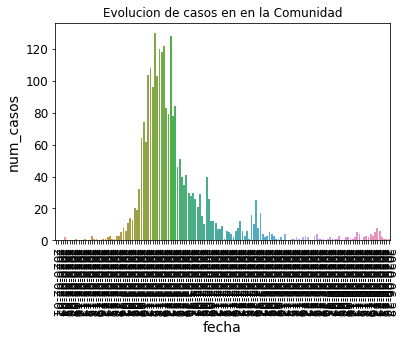

In [4]:
csvCV.tail(30)

#Evaluamos los casos con Covid en la comunidad Escogida. 
p = sns.barplot(x ='fecha', y = 'num_casos', data=csvCV, estimator=np.mean);
p.set(title='Evolucion de casos en en la Comunidad')
p.set_xticklabels(p.get_xticklabels(), rotation=-90);

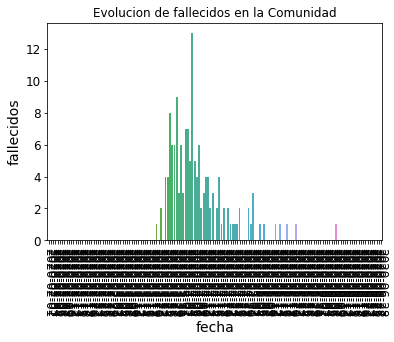

In [5]:
csvCV.tail(30)

#Evaluamos los fallecidos por Covid  en la Comunidad Escogida 
p = sns.barplot(x ='fecha', y = 'fallecidos', data=csvCV, estimator=np.mean);
p.set(title='Evolucion de fallecidos en la Comunidad')
p.set_xticklabels(p.get_xticklabels(), rotation=-90);

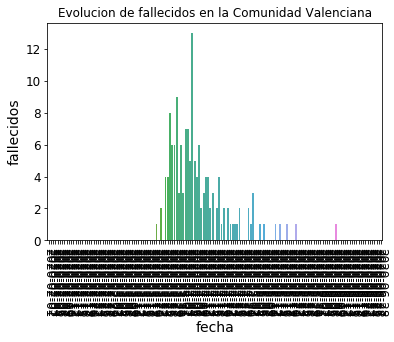

In [6]:
csvCV.tail(30)

#Evaluamos los diagnosticados con pcr . 
p = sns.barplot(x ='fecha', y = 'fallecidos', data=csvCV, estimator=np.mean);
p.set(title='Evolucion de fallecidos en la Comunidad Valenciana')
p.set_xticklabels(p.get_xticklabels(), rotation=-90);

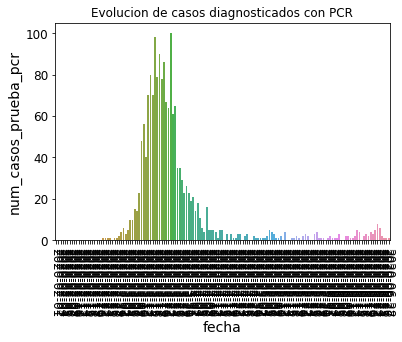

In [7]:
#Evaluamos los casos de diagnosticados por pcr en la comunidad Valenciana 
p = sns.barplot(x ='fecha', y = 'num_casos_prueba_pcr', data=csvCV, estimator=np.mean);
p.set(title='Evolucion de casos diagnosticados con PCR')
p.set_xticklabels(p.get_xticklabels(), rotation=-90);

In [8]:
# Seleccionamos las columnas mas importantes
column_1 = 'num_casos'
column_2 = 'tmed'
data = csvCV[[column_1, column_2]]

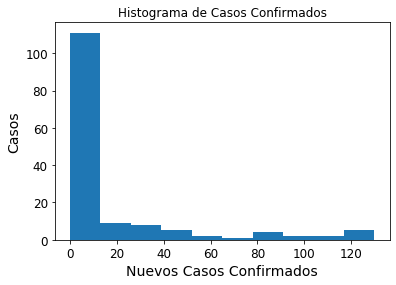

In [9]:
#Realizamos un histograma.
ax = data.num_casos.hist(grid=False);

ax.set(xlabel='Nuevos Casos Confirmados', 
       ylabel='Casos', 
       title='Histograma de Casos Confirmados');
#Para nosotros contar las veces que se repite estos datos, no es importante, para nosotros lo interesante
#seria las veces que se repite Value, que es el numero de medicos que hay por casi 1000 habitantes.

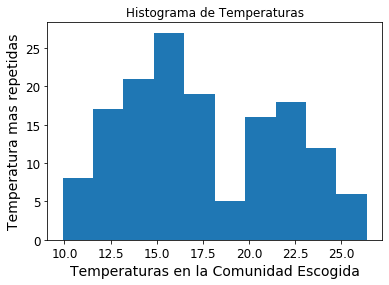

In [10]:
#Realizamos un histograma segun las temperaturas mas repetidas.
ax = data.tmed.hist(grid=False);

ax.set(xlabel='Temperaturas en la Comunidad Escogida', 
       ylabel='Temperatura mas repetidas', 
       title='Histograma de Temperaturas');
#Para nosotros contar las veces que se repite estos datos, no es importante, para nosotros lo interesante
#seria las veces que se repite Value, que es el numero de medicos que hay por casi 1000 habitantes.

In [11]:
#En este caso podemos eliminar de nuestra clasificacion los patrones que veamos que no nos aportan mucho
#New_Confirmed_Cases = enf.New_Confirmed_Cases > 100
#New_Fatalities = enf.New_Fatalities >50
#enf= enf[New_Confirmed_Cases & New_Fatalities]

In [12]:
print(f"There are {data.shape[1]:,} columns in the dataframe.")
print(f"There are {data.shape[0]:,} rows in the dataframe.")

There are 2 columns in the dataframe.
There are 149 rows in the dataframe.


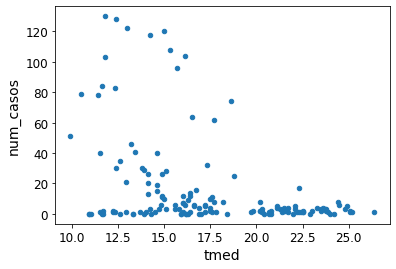

In [13]:
#Comprobamos la relacion que puede haber entre estas dos 
# En este caso comprobamos como la temperatura media y el numero de casos confirmados. 
data.plot.scatter(x=column_2,
                y=column_1);

In [14]:
#Usamos ELBOW para comprobar cuantos clusteres usar: 
# Let's fit a different model for each value of k
k_values = range(1, 10)

# Fit a model for each value of k
k_mean_models = [KMeans(n_clusters=i) for i in k_values]

# See how the scores change
scores = [-k_mean_models[i].fit(data).score(data) 
              for i, model in enumerate(k_mean_models)]

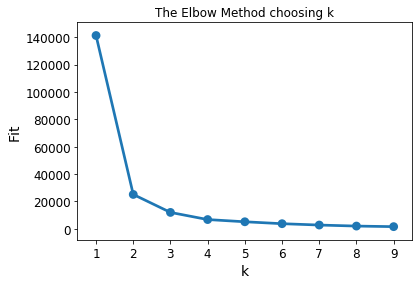

In [15]:
# Let's plot the effect k on the clustering
ax = sns.pointplot(x=list(k_values),
                   y=scores);
ax.set(xlabel='k', 
       ylabel='Fit', 
       title='The Elbow Method choosing k');

In [16]:
#A partir del tratamiento de ELBOW, para estos datos que tenemos, podemos usar 4 clusteres y a partir de el rendimiento 
#Como vemos no va a mejorar demasiado. Asi que usaremos dos k=2

In [17]:
#Inicializamos nuestro Clustering.Reocerdemos que un metodo no supervisado.
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=4) # Number of clusters should be 2 or 3
kmeans.fit(data);

In [18]:
# Add the cluster labels for each data point to the dataframe
data['kmeans_labels'] = kmeans.labels_

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


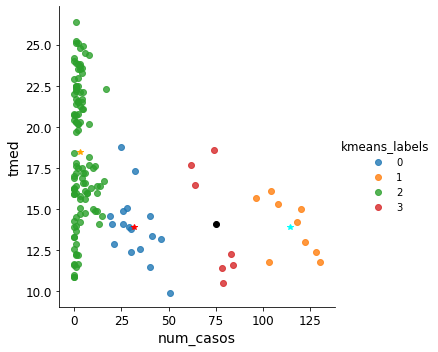

In [19]:
# Plot k-means
kmeans_plot = sns.lmplot(x=column_1, 
                         y=column_2, 
                         data=data, 
                         fit_reg=False,        # Do not fit a regression line to the data
                         hue="kmeans_labels",  #'hue' will color code each group
                         legend=True);
#Para cada k cluster representamos los valores, como vemos el comportamiento es de matriz[filas][columnas]

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

# Plot the mean of cluster #3 (if present)
kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='orange', marker='*');
# Plot the mean of cluster #4 (if present)
kmeans_plot.ax.plot(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][1], color='black', marker='o');
